In [29]:
from utils import get_rho_asset_correlation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
PD_list = np.arange(0.0, 0.11, 0.001)

In [9]:
rho_list = []
for p in PD_list:
    rho_list.append(get_rho_asset_correlation(p))

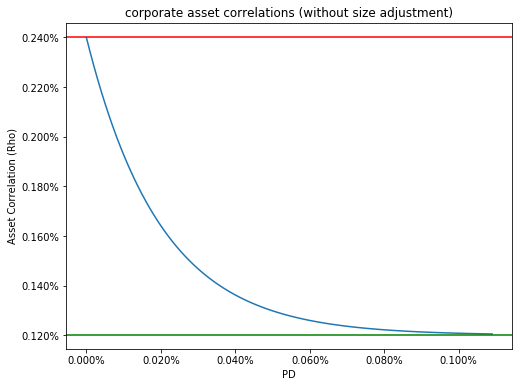

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(PD_list, rho_list)

# X axis
ax.set_xlabel("PD")
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

# Y axis
ax.set_ylabel("Asset Correlation (Rho)")
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Title
ax.set_title("corporate asset correlations (without size adjustment)")

# Lines
ax.axhline(0.24, color='r')
ax.axhline(0.12, color='g')